In [2]:
import spacy
from rebel import spacy_component
import json
import pandas as pd
import time
import re
from tqdm import tqdm
from text_preprocessing import *
from matplotlib import pyplot as plt
import itertools
import networkx as nx
from collections import Counter
# import dask.bag as db

In [3]:

nlp = spacy.load("en_core_web_lg")
print("S")
nlp.add_pipe("rebel", after="senter", config={
    'device':2, # Number of the GPU, -1 if want to use CPU
    'model_name':'Babelscape/rebel-large'} # Model used, will default to 'Babelscape/rebel-large' if not given
    )

S


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## Arxiv dataset

In [58]:
# docs = db.read_text('../data/arxiv-metadata-oai-snapshot.json').map(json.loads)
# data = docs.take(2054579)
# docs.count().compute()

In [5]:
def get_metadata():
    with open('../data/Arxiv/arxiv-metadata-oai-snapshot.json', 'r') as f:
        for line in f:
            yield line

In [6]:
metadata = get_metadata()

In [7]:
titles = []
ids = []
abstracts = []
authors_parsed = []
authors = []
years = []
for paper in tqdm(metadata):
    paper_dict = json.loads(paper)
    ref = paper_dict.get('journal-ref')
    try:
        # year = int(ref[-4:]) 
        # years.append(year)
        # ids.append(paper_dict.get('id'))
        # authors_parsed.append(paper_dict.get('authors_parsed'))
        # authors.append(paper_dict.get('authors'))
        titles.append(paper_dict.get('title'))
        abstracts.append(paper_dict.get('abstract'))
    except Exception as e:
        # print(e)
        pass 



2054579it [00:30, 66503.11it/s]


In [8]:
papers = pd.DataFrame({
    'title': titles,
    'abstract': abstracts
})
papers.head()

,title,abstract
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-..."
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...


In [9]:
papers.shape

(2054579, 2)

In [10]:
papers.to_pickle('../data/Arxiv/arxiv_papers_processed_135.pickle')

In [ ]:
papers = pd.read_pickle('../data/Arxiv/arxiv_papers_processed_135.pickle')

### Relation extraction runs in cmd : ```run_rebel_arxiv.py```

### Extracted relations analysis

In [3]:
with open('./arxiv_rel_extracted_0_84K.json', 'r') as fp:
    data0_84 = json.load(fp)

In [4]:
with open('./arxiv_rel_extracted_84_167K.json', 'r') as fp:
    data84_167 = json.load(fp)

In [5]:
with open('./arxiv_rel_extracted_167_250K.json', 'r') as fp:
    data167_250K = json.load(fp)

In [6]:
with open('./arxiv_rel_extracted_250_290K.json', 'r') as fp:
    data250_290K = json.load(fp)

In [7]:
with open('./arxiv_rel_extracted_290_330K.json', 'r') as fp:
    data290_330K = json.load(fp)

In [8]:
with open('./arxiv_rel_extracted_330_370K.json', 'r') as fp:
    data330_370K = json.load(fp)

In [9]:
all_edges = []
relation_types = list()
for data in [data0_84, data84_167, data167_250K, data250_290K, data290_330K, data330_370K]:
    for i in tqdm(list(data.keys())[:-1], total=len(data.keys())):
        relation_types.append(data[i]['relation'])
        all_edges.append(data[i])

100%|█████████▉| 137901/137902 [00:00<00:00, 1302051.72it/s]


In [10]:
all_edges_df = pd.DataFrame(all_edges)
all_edges_df =all_edges_df.rename({'relation': 'edge', 'tail': 'target', 'head': 'source'}, axis=1)
all_edges_df.to_pickle('arxiv_main_graph.pickle')

In [93]:
# all_edges_df = pd.read_pickle('arxiv_main_graph.pickle')
all_edges_df = all_edges_df.drop_duplicates(subset=['source', 'target'])
all_edges_df = all_edges_df[~(all_edges_df['source'] == all_edges_df['target'])]

In [94]:
all_edges_df.iloc[1050:1100, :]

,edge,source,target
1057,part of,dependency among the evidence sentence,question sentence
1058,has part,question sentence,dependency among the evidence sentence
1059,use,HotpotQA,evidence extraction
1060,use,FEVER,evidence extraction
1061,has part,formal,statistical
1062,part of,statistical,formal
1063,subclass of,social network tie,intersubjective
1064,instance of,cultural similarity,cultural orientations
1065,subclass of,contesting field,social network
1066,has part,creative collectives,cultural production


## Get unique relation types

In [35]:
unique_relation_types_counter = dict(Counter(relation_types))
unique_relation_types_vc = dict(sorted(unique_relation_types_counter.items(), key=lambda t: t[1], reverse=True))

In [95]:
unique_relation_types_vc

{'subclass of': 403969,
 'part of': 153649,
 'instance of': 120672,
 'has part': 118967,
 'facet of': 105690,
 'opposite of': 68146,
 'studied by': 47335,
 'studies': 34955,
 'use': 32680,
 'different from': 26654,
 'has effect': 20620,
 'uses': 19523,
 'followed by': 15165,
 'has cause': 14126,
 'follows': 11973,
 'used by': 10458,
 'said to be the same as': 6819,
 'discoverer or inventor': 6513,
 'named after': 5531,
 'field of work': 5255,
 'point in time': 4878,
 'has parts of the class': 3778,
 'based on': 3722,
 'main subject': 3016,
 'notable work': 2755,
 'student': 2358,
 'student of': 2041,
 'country': 1910,
 'product or material produced': 1539,
 'depicts': 1210,
 'field of this occupation': 1180,
 'practiced by': 1086,
 'location': 989,
 'influenced by': 975,
 'located in the administrative territorial entity': 915,
 'developer': 892,
 'shares border with': 877,
 'programming language': 876,
 'connects with': 860,
 'owned by': 799,
 'author': 798,
 'operator': 779,
 'public

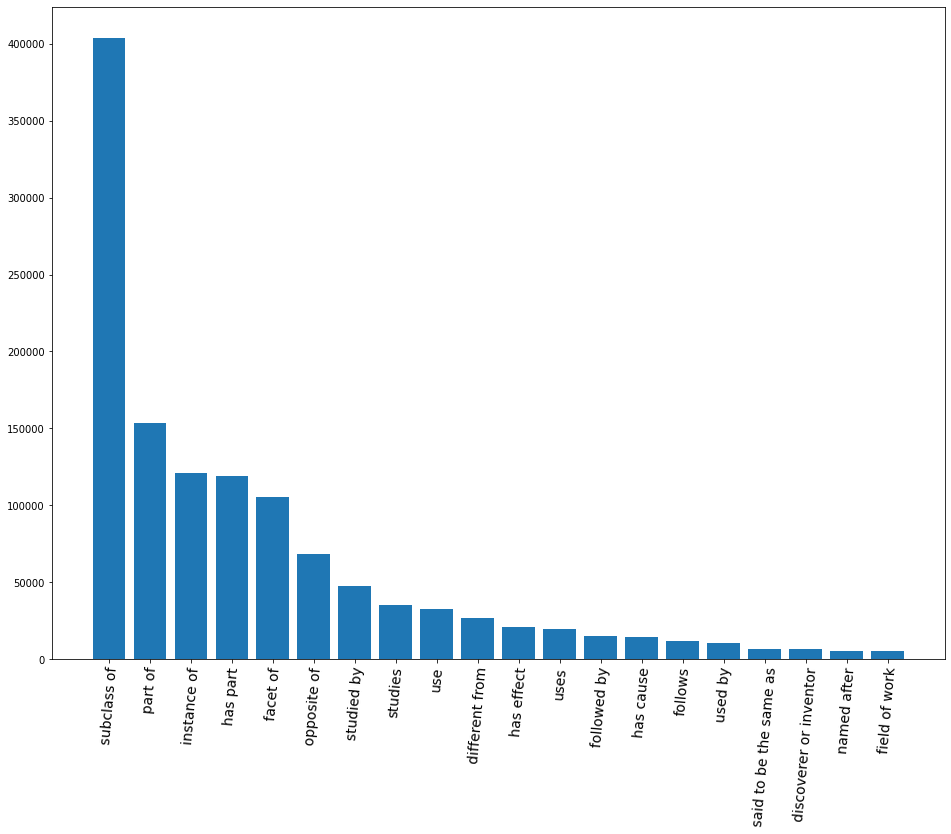

In [36]:
plt.figure(figsize=(16, 12))
plt.bar(*zip(*dict(itertools.islice(unique_relation_types_vc.items(), 20)).items()))
plt.xticks(rotation=85, fontsize=14)
plt.show()


### Example of texts and extracted relations

In [67]:
example_rel_type = list()
studied_by_edges = []
for k, v in tqdm(list(data.items())[:-1], total=len(data.items())):
    if v['relation'] == 'studied by':
        example_rel_type.append((k, v))
        studied_by_edges.append(v)

100%|█████████▉| 137901/137902 [00:00<00:00, 1141179.25it/s]


In [52]:
example_rel_type

[('We discus the potential cosmological role of gravitational wave astronomy a a probe of the very early universe . The next generation of detector now in production may be able to observe a stochastic background of gravitational wave produced by violent process during the earliest moment after the creation of the universe . Viable theoretical scenario within detector sensitivity include strongly first order phase transitions, possibly at the end of inflation, and network of cosmic string . At this stage, other primordial background from slow roll inflation, global topological defect and the standard electroweak phase transition appear to be out of range . The discovery of any of the possible cosmological source will have enormous implication for our understanding of the very early universe and for fundamental physic at the highest energy .->(17, 4)',
  {'relation': 'studied by', 'head': 'universe', 'tail': 'cosmological'}),
 ('The conventional theory of burning work well in the case o

## Compose KG with one type of edges : "use"

In [72]:
use_edges = all_edges_df[all_edges_df.edge.isin(['uses'])]

In [73]:
use_edges.target.value_counts().head(20)

deep learning                   282
deep neural network             145
algorithm                       100
qubit                            96
convolutional neural network     87
neural network                   84
CNN                              82
blockchain                       81
machine learning                 74
Deep learning                    68
BERT                             49
Deep neural network              44
deep reinforcement learning      43
GPU                              43
CMOS                             41
MapReduce                        39
detector                         36
state of the art method          35
ImageNet                         35
MATLAB                           34
Name: target, dtype: int64

In [74]:
use_graph = nx.from_pandas_edgelist(use_edges, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [75]:
print(nx.info(use_graph))

MultiDiGraph with 38401 nodes and 30435 edges


/tmp/ipykernel_141387/3656409543.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(use_graph))


In [45]:
print(
    "Avg degree: ", sum([i[1] for i in use_graph.degree(list(use_graph.nodes))])/len(list(use_graph.nodes)))

Avg degree:  1.5851149709642978


In [46]:
# Gcc = sorted(nx.strongly_connected_components(use_graph), key=len, reverse=True)
# G0 = use_graph.subgraph(Gcc[0])


### Visualize KG with one type of edges

In [47]:
from pyvis.network import Network

In [78]:
net = Network(height="75%", width="75%", notebook=True, directed=True)


In [79]:
H = use_graph.subgraph(list(use_graph.predecessors('image classification'))+list(use_graph.successors('image classification'))+['image classification'])

In [50]:
GccH = sorted(nx.strongly_connected_components(H), key=len, reverse=True)

In [61]:
print(nx.info(H))

MultiDiGraph with 82 nodes and 97 edges


/tmp/ipykernel_141387/1812221479.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(H))


In [80]:
net.from_nx(H)

In [ ]:
net.show('test_net.html')

In [81]:
net.save_graph('test_net.html')

In [77]:
use_edges[use_edges.source=='image classification']

,edge,target,source
5772,use,Deep convolutional neural network,image classification
5784,use,deep network,image classification
13131,use,distribution aware quantization,image classification
13132,use,quantization regularization,image classification
13133,use,bias tuning,image classification
...,...,...,...
1221230,use,pipeline,image classification
1221231,use,algorithm,image classification
1222246,use,label consistent k svd LC KSVD algorithm,image classification
1245880,use,AP loss,image classification


## Check some relation types

In [82]:
def check_rel_types(rel_type):
    check_edges = all_edges_df[all_edges_df.edge.isin([rel_type])]
    return check_edges

In [98]:
check_edges = check_rel_types(rel_type='has effect')
check_edges.head(50)

,edge,source,target
21,has effect,statistical errors,uncertainty
24,has effect,prediction,prediction accuracy
79,has effect,reverse shock,magnetization
236,has effect,planet formation,planetesimal
248,has effect,entanglement,attractive interaction
255,has effect,interaction,entanglement
256,has effect,entanglement,localization
258,has effect,quench,thermalize
299,has effect,SARS CoV 2 community infection,COVID 19 pandemic
305,has effect,SARS CoV 2,community
